# Part I - (FordGoBike Trip Data)
## by Kingsolomon Ifeanyichukwu

## Introduction
    This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area by Ford GoBike.




## Preliminary Wrangling


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [4]:
bike_data = pd.read_csv('./1. Data/fordgobike-tripdata.csv')

In [5]:
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
bike_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
bike_data.shape

(183412, 16)

In [9]:
bike_data.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [10]:
bike_data.shape

(183412, 16)

In [11]:
bike_data.sample(5, random_state=2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
85812,358,2019-02-17 14:19:58.2350,2019-02-17 14:25:57.0630,113.0,Franklin Square,37.764555,-122.410345,107.0,17th St at Dolores St,37.763015,-122.426497,5902,Subscriber,1998.0,Male,No
84835,1100,2019-02-17 16:26:20.0960,2019-02-17 16:44:40.1250,72.0,Page St at Scott St,37.772406,-122.435650,109.0,17th St at Valencia St,37.763316,-122.421904,6288,Subscriber,1978.0,Female,No
114724,670,2019-02-12 09:11:55.4170,2019-02-12 09:23:05.9180,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,26.0,1st St at Folsom St,37.787290,-122.394380,5162,Subscriber,1986.0,Male,No
149266,429,2019-02-06 19:37:12.9800,2019-02-06 19:44:22.7000,370.0,Jones St at Post St,37.787327,-122.413278,285.0,Webster St at O'Farrell St,37.783521,-122.431158,5566,Subscriber,1986.0,Male,No
67178,772,2019-02-20 08:06:38.5800,2019-02-20 08:19:31.0170,22.0,Howard St at Beale St,37.789756,-122.394643,88.0,11th St at Bryant St,37.770030,-122.411726,6141,Subscriber,1980.0,Male,No


In [12]:
bike_data.duplicated().sum()

0

In [13]:
bike_data.duration_sec.max()

85444

In [14]:
bike_data.duration_sec.min()

61

## Data Cleaning Observations

### start_time is an object, should be of datetime datatype
### end_time is an object, should be of datetime datatype
### start_station_id and end_station_id have null values
### start_station_id is a float, needs to be object
### end_station_id is a float, needs to be object
### bike_id is an int, should be object
### member birth_year is a float, needs to be in int format
### member birth_year contains null values
### user_type is object, should be category
###  bike_share_for_all_trip won't be useful for our analysis, we drop the null values existing in the dataset

## Cleaning Dataset

In [15]:
bike_data_clean = bike_data.copy()

### start_time and end_time are objects, should be in datetime

### Define:
#### Use pd.datetime to convert start_time and end_time to datetime datatype

#### Code

In [16]:
bike_data_clean[['start_time', 'end_time']] = bike_data_clean[['start_time', 'end_time']].apply(pd.to_datetime)


### Test

In [17]:
bike_data_clean[['start_time', 'end_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   start_time  183412 non-null  datetime64[ns]
 1   end_time    183412 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 2.8 MB


### start_station_id and end_station_id have null values

In [18]:
bike_data_clean['start_station_id'].isnull().sum()

197

In [19]:
bike_data_clean['end_station_id'].isnull().sum()

197

### Define

### Use dataframe.dropna to drop null values

### Code

In [20]:
bike_data_clean.dropna(subset=['end_station_id', 'start_station_id'], inplace=True)

### Test

In [21]:
bike_data_clean['end_station_id'].isnull().sum()

0

In [22]:
bike_data_clean['start_station_id'].isnull().sum()

0

### start_station_id is a float, needs to be object
### end_station_id is a float, needs to be object
### bike_id is an int, should be object

### Define

### Use astype function to convert start_station_id, end_station_id and bike_id to object

### Code

In [23]:
bike_data_clean[['start_station_id', 'end_station_id', 'bike_id']] =  bike_data_clean[['start_station_id', 'end_station_id', 'bike_id']].astype(int).astype(str)

### TEST

In [24]:
bike_data_clean[['start_station_id', 'end_station_id', 'bike_id']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   start_station_id  183215 non-null  object
 1   end_station_id    183215 non-null  object
 2   bike_id           183215 non-null  object
dtypes: object(3)
memory usage: 5.6+ MB


###  bike_share_for_all_trip won't be useful for our analysis, we drop it

# Define

#### Drop the  bike_share_for_all_trip, start_station_name and end_station_name using dataframe.drop method

In [25]:
bike_data_clean.drop(['bike_share_for_all_trip'], axis=1, inplace=True)

# Test

In [26]:
bike_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  object        
 12  user_type       

### member birth_year contains null values

# Define

### drop all null values in member_birth_year column

In [27]:
# Check the member_birth_year missing values ratio to whole dataset
bike_data_clean['member_birth_year'].isnull().sum() / len(bike_data_clean)

# As it is less than 5%, it will be dropped.

0.04510001910323937

# Code

In [28]:
bike_data_clean.dropna(subset=['member_birth_year'], inplace=True)

# Test

In [29]:
bike_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

### member_birth_year is a float, needs to be in int format


# Define

#### convert member_birth_year to int datatype

# Code

In [30]:
bike_data_clean['member_birth_year'] = bike_data_clean['member_birth_year'].astype(int)

# Test

In [31]:
bike_data_clean.member_birth_year.dtype

dtype('int32')

### user_type is object, should be category

#### Define: Convert user_type column to category

# Code

In [32]:
bike_data_clean['user_type'] = bike_data_clean['user_type'].astype('category')

# Test

In [33]:
bike_data_clean['user_type'].dtype

CategoricalDtype(categories=['Customer', 'Subscriber'], ordered=False)

## Feature Engineering

#### 1. Add members age
#### 2. Create month, day_of_week and hour column from start_time column

In [34]:
## Add member age

date_now = pd.Timestamp('now').year
bike_data_clean['age'] = date_now - bike_data_clean['member_birth_year']

In [35]:
bike_data_clean['start_dayofweek'] = pd.DatetimeIndex(bike_data_clean['start_time']).dayofweek
bike_data_clean['start_hour'] = pd.DatetimeIndex(bike_data_clean['start_time']).hour

# Transform dayofweek number to day name
bike_data_clean['start_dayofweek'] = bike_data_clean['start_dayofweek'].apply(lambda x: calendar.day_abbr[x])

In [36]:
bike_data_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,age,start_dayofweek,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,38,Thu,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,50,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,33,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,48,Thu,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,63,Thu,23


## Visualization and Insights

#### Q1. How are users distributed between Customers and Subscribers?
#### Q2. What is the distribution of age?
#### Q3. Distribution of gender
#### Q4. What hours of the day are there spike in bike usage?
#### Q5. Which day of the week are there increase in bike usage?
#### Q6. Which station_name has the most in bike starting point and ending point?

### Univariate Analysis

#### Q1. How are users distributed between Customers and Subscribers?

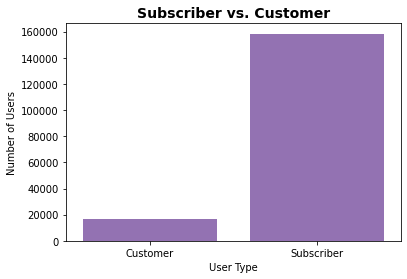

In [37]:
base_color = sb.color_palette()[4]
plt.figure(figsize=[6,4])
sb.countplot(data=bike_data_clean, x='user_type', color=base_color)
plt.title('Subscriber vs. Customer', fontsize=14, fontweight='bold')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=0);

#### A high number of users who are using the bike service are subscribers

### Q2: What is the distribution of age?

In [38]:
base_color = sb.color_palette()[4]

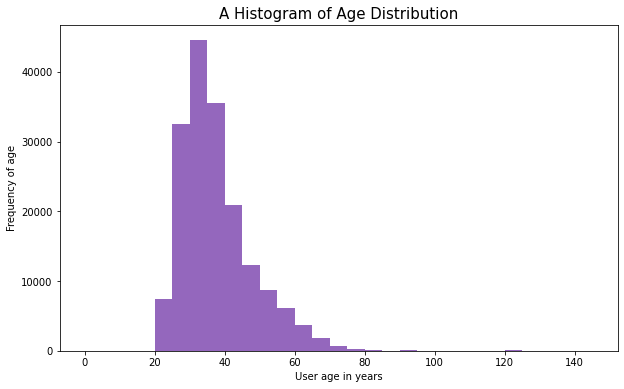

In [39]:
plt.figure(figsize = [10, 6])
age_bins = np.arange(0, bike_data_clean['age'].max()+5, 5)
plt.hist(data=bike_data_clean, x='age', bins=age_bins, color=base_color)
plt.title('A Histogram of Age Distribution',fontsize=15);
plt.xlabel('User age in years');
plt.ylabel('Frequency of age');

#### The histogram shows that majority of users are between the age of 25 to 35 years old.
#### This should be considered acceptable since majority of the  populace at that age are young adults who also could be gainfully employed

### Q3. Distribution of gender

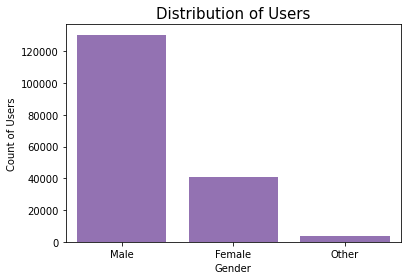

In [40]:
gender_order = bike_data_clean['member_gender'].value_counts()     # get the order of more frequent members gender
sb.countplot(data=bike_data_clean,x='member_gender',color=base_color, order=gender_order.index);   # Plot member gender
plt.title('Distribution of Users', fontsize=15);
plt.xlabel('Gender');
plt.ylabel('Count of Users');

### Of course, Male gender always dominates. And for a means of transportation which could be considered stressful by the opposite gender, male users dominates. They could also see it as a means of exercise.

### Q4. What hours of the day are there spike in bike usage?

Text(0, 0.5, 'Count of Bike Rides Per Hour')

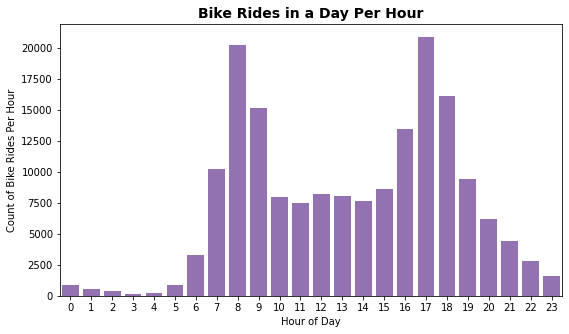

In [41]:
plt.figure(figsize=(9,5))
sb.countplot(data=bike_data_clean, x='start_hour', color=base_color)
plt.title('Bike Rides in a Day Per Hour', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day');
plt.ylabel('Count of Bike Rides Per Hour')

### The maximum hour in the morning been 8a.m and 9a.m which is considered the time when people do leave their house, enroute to their workplace or location of daily hustle. In the eveneing, 17:00 and 18:00 which is considered 5p.m and 6p.m, are normal hours of returning back from work after a stressfull day

## Q5. Which day of the week are there increase in bike usage?

Text(0, 0.5, 'Count of Bike Rides Per Day')

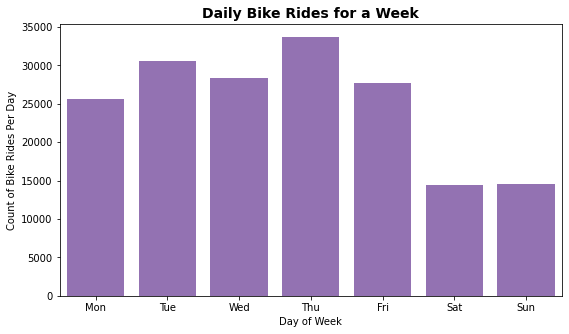

In [42]:
day_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(9,5))
base_color = sb.color_palette()[4]
sb.countplot(data=bike_data_clean, x='start_dayofweek', color=base_color, order=day_of_week)
plt.title('Daily Bike Rides for a Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week');
plt.ylabel('Count of Bike Rides Per Day')

#### Saturday and Sundays ranking lowest shows that pleasure and time with family should be a priority. Unless these spike in bike usage on saturdays and sundays are for weekend groove and attending events.

#### Most of the users are daily commuters who use the service to work/school on weekdays and less on weekend for leisure.

### Q6. Which station_name has the most in bike starting point?

Text(0.5, 0, '')

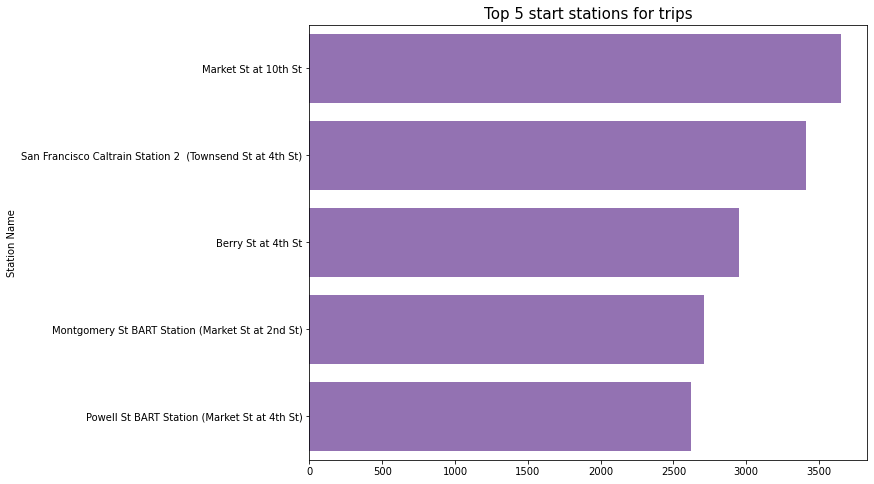

In [43]:
plt.figure(figsize=(10,8))
start_station_order = bike_data_clean['start_station_name'].value_counts()[0:5]
sb.countplot(data=bike_data_clean,y='start_station_name',color=base_color, order=start_station_order.index)
plt.title('Top 5 start stations for trips',fontsize=15)
plt.ylabel('Station Name')
plt.xlabel('')


Bike users high trips start stations are:-

        Market St at 10th St,
        San Francisco Caltrain Station 2 (Townsend St at 4th St),
        Berry St at 4th St,
        Montgomery St BART Station (Market St at 2nd St),
        Powell St BART Station (Market St at 4th St)).



### Q6. Which station_name has the least in bike starting point?

Text(0.5, 0, '')

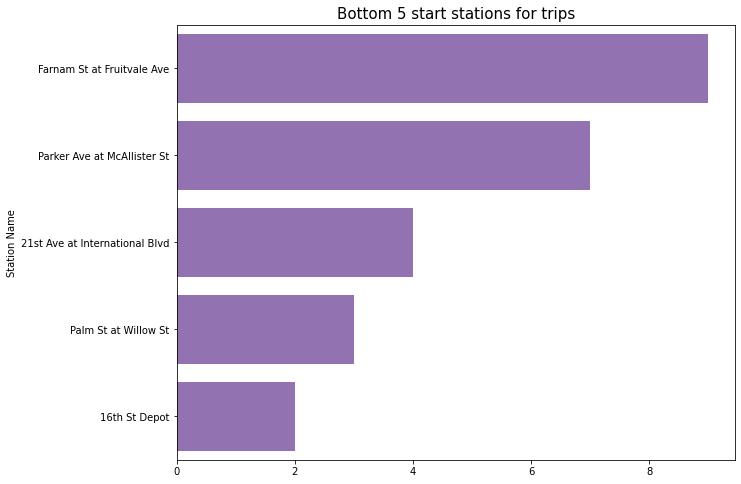

In [44]:
plt.figure(figsize=(10,8))
start_station_order = bike_data_clean['start_station_name'].value_counts()[-5:]
sb.countplot(data=bike_data_clean,y='start_station_name',color=base_color, order=start_station_order.index)
plt.title('Bottom 5 start stations for trips',fontsize=15)
plt.ylabel('Station Name')
plt.xlabel('')

Bike users lowest trips start stations are:-

        Farnam St at Fruitvale Ave,
        Parker Ave at McAllister St,
        21st Ave at International Blvd,
        Palm St at Willow St,
        16th St Depot.


### Bivariate Exploration


### Q1: What is the hourly bike usage per user type
### Q2: What is the hourly bike usage per gender
### Q3: What is the distribution of gender per user type
### Q4: What is the distribution of user type per gender
### Q5: What is the daily bike usage per user type
### Q6: What is the daily bike usage per gender

### Q1: What is the hourly bike usage per user type


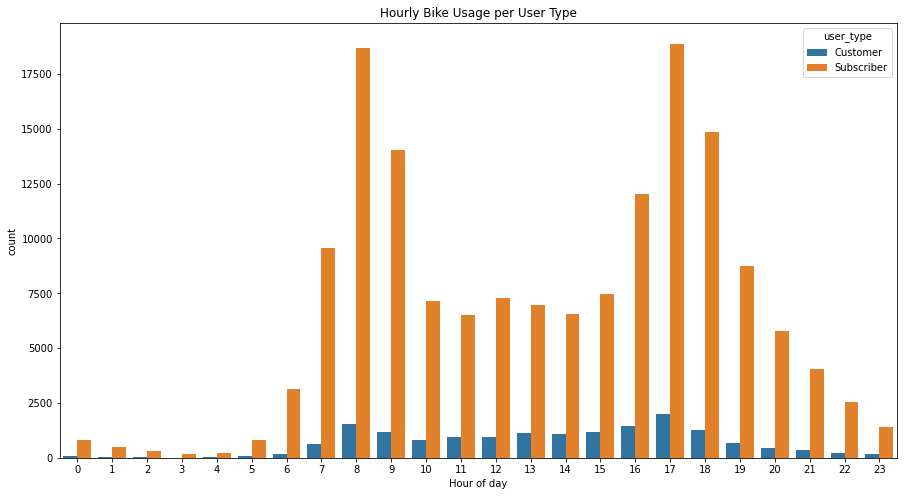

In [45]:
plt.figure(figsize = (15, 8))
sb.countplot(data = bike_data_clean, x = 'start_hour', hue = 'user_type')
plt.xlabel('Hour of day')
plt.title('Hourly Bike Usage per User Type');

### The daily hourly trend shows that subscribers have more bike rides than customers.

### Q2: What is the hourly bike usage per gender


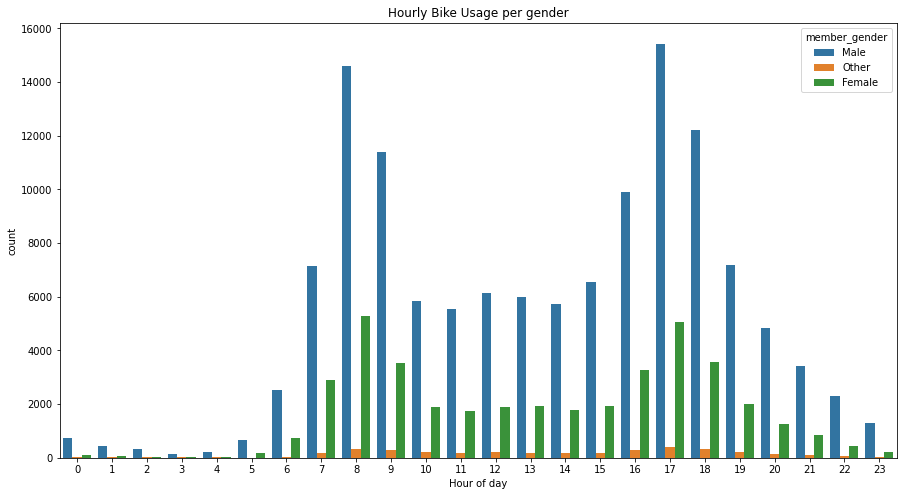

In [46]:
plt.figure(figsize = (15, 8))
sb.countplot(data = bike_data_clean, x = 'start_hour', hue = 'member_gender')
plt.xlabel('Hour of day')
plt.title('Hourly Bike Usage per gender');

### The daily hourly trend per gender shows that male users have more bike rides than females, putting into consideration that male users are more bike users than females

### Q3: What is the distribution of gender per user type


Text(0, 0.5, '')

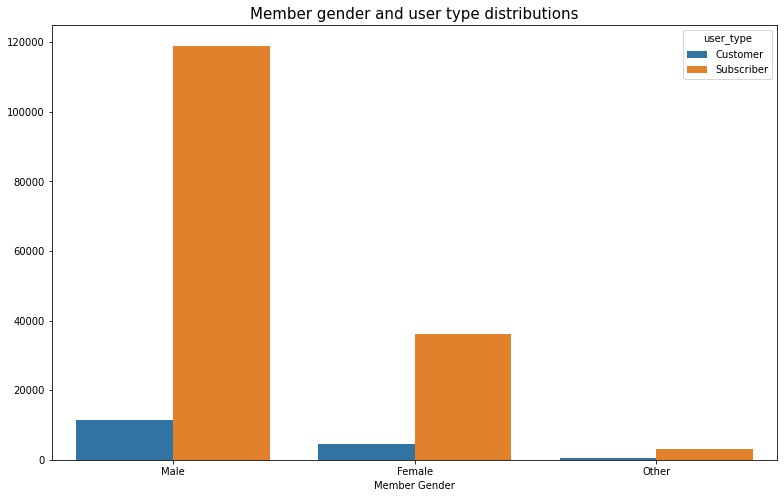

In [47]:
plt.figure(figsize=(13,8))
sb.countplot(data = bike_data_clean, x = 'member_gender', hue = 'user_type', order=['Male','Female','Other'])
plt.title('Member gender and user type distributions', fontsize=15)
plt.xlabel('Member Gender')
plt.ylabel(None)

### The graph shows that males has more users compared to females both as subscribers and customers

### Q4: What is the distribution of user type per gender


Text(0, 0.5, '')

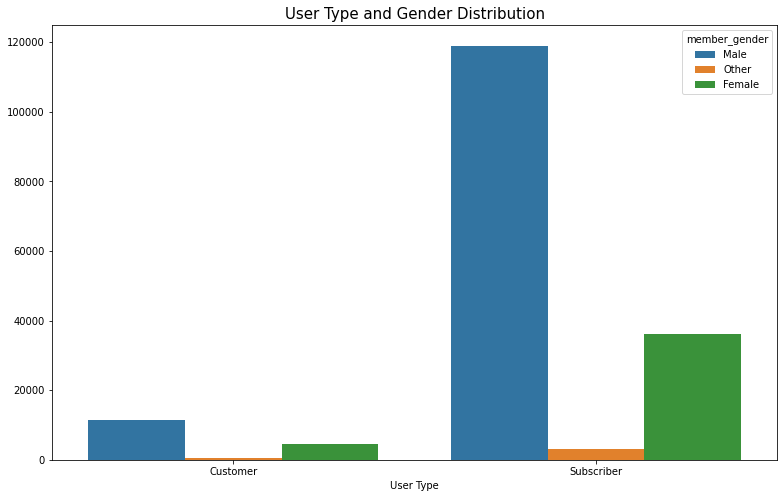

In [48]:
plt.figure(figsize=(13,8))
sb.countplot(data = bike_data_clean, x = 'user_type', hue = 'member_gender')
plt.title('User Type and Gender Distribution', fontsize=15)
plt.xlabel('User Type')
plt.ylabel('')

#### Subscribers user type records more users compared to the customer user type

### Q5: What is the daily bike usage per user type


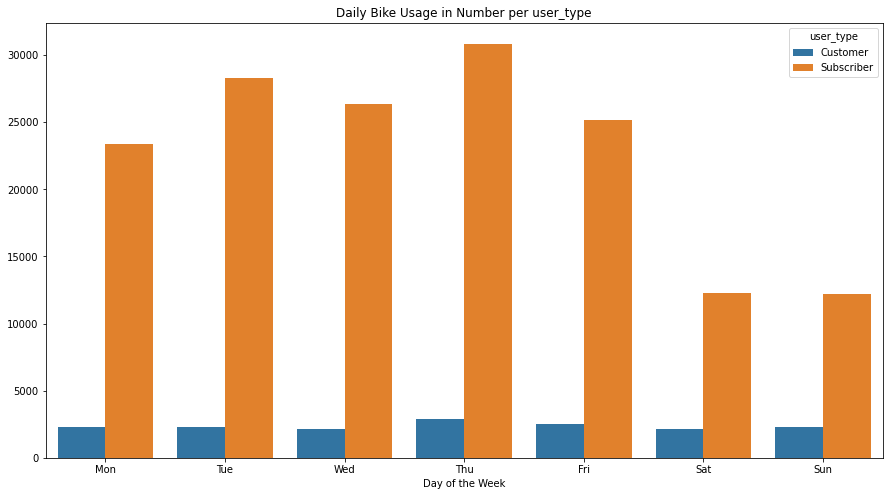

In [49]:
plt.figure(figsize = (15, 8))
sb.countplot(data = bike_data_clean, x = 'start_dayofweek', hue = 'user_type', order=day_of_week)
plt.xlabel('Day of the Week')
plt.ylabel('')
plt.title('Daily Bike Usage in Number per user_type');

#### Because there are more users who are subscribers than customers, daily trend shows increase in the usage for subscribers

### Q6: What is the daily bike usage per gender

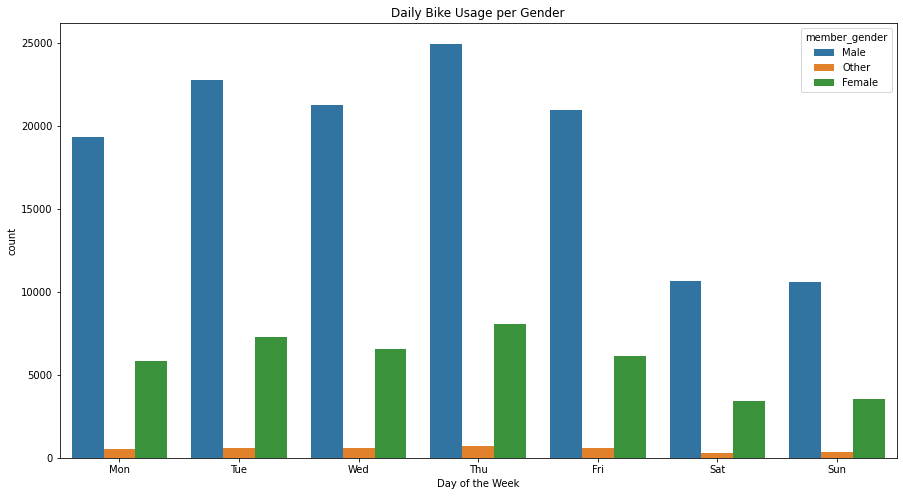

In [50]:
plt.figure(figsize = (15, 8))
sb.countplot(data = bike_data_clean, x = 'start_dayofweek', hue = 'member_gender', order=day_of_week)
plt.xlabel('Day of the Week')
plt.title('Daily Bike Usage per Gender');

#### Male users are more frequent in the usage of bikes compared to the females

### Q7. Relationship between member age and trip duration

Text(0, 0.5, 'log scaled of Trip duration (sec)')

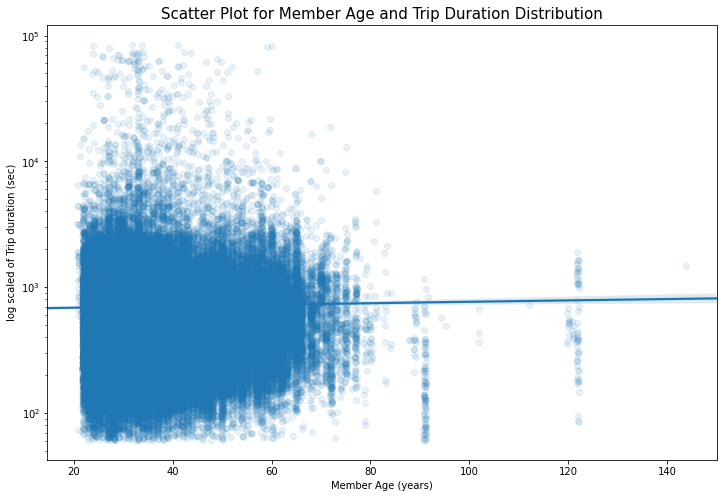

In [51]:
plt.figure(figsize=(12,8))
ax = sb.regplot(data=bike_data_clean,x='age',y='duration_sec',x_jitter=0.3, truncate=False, scatter_kws={'alpha':1/10})
ax.set_yscale('log')
plt.title('Scatter Plot for Member Age and Trip Duration Distribution', fontsize=15)
plt.xlabel('Member Age (years)')
plt.ylabel('log scaled of Trip duration (sec)')

#### Clearly, the scatter plot shows no positive relationship between memebrs age and the duration of their trips. So the duration of trips is not in any way influenced by the age of the bike users. Trip duration could be as a result of how short or far the trip might be.

## Multivariate Exploration


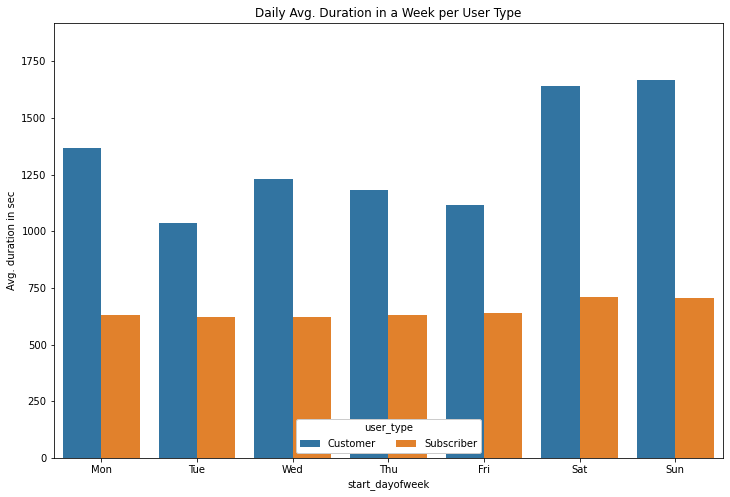

In [52]:
plt.figure(figsize = (12, 8))
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax = sb.barplot(data = bike_data_clean, x = 'start_dayofweek', y = 'duration_sec', hue = 'user_type', 
                 errwidth = 0, order=order)
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'user_type')
plt.ylabel('Avg. duration in sec')
plt.title('Daily Avg. Duration in a Week per User Type');

### Daily avg. trip duration for customers are longer than subscribers.  Both subscribers and customers take longer trips during weekend than weekdays. Customers take longer trips during the weekend.

In [55]:
bike_data_clean.to_csv('./1. Data/bike_data_clean.csv', index=False)


> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

